In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfo = pd.read_csv(r'train.csv', low_memory=False, parse_dates=['Date'])
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


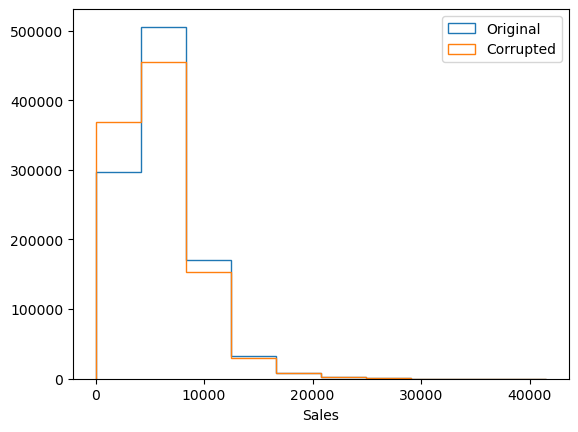

In [13]:
mask = np.random.choice(10, size=dfo.shape[0]) == 0
dfo['NewSales'] = dfo.Sales.copy()
dfo.loc[mask, 'NewSales'] = np.nan

plt.hist(dfo.Sales, label="Original", histtype='step')
plt.hist(dfo.NewSales.fillna(0), label='Corrupted', histtype='step')
plt.legend(), plt.xlabel('Sales');

In [14]:
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,NewSales
0,1,5,2015-07-31,5263,555,1,1,0,1,5263.0
1,2,5,2015-07-31,6064,625,1,1,0,1,NaN
2,3,5,2015-07-31,8314,821,1,1,0,1,8314.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,13995.0
4,5,5,2015-07-31,4822,559,1,1,0,1,4822.0


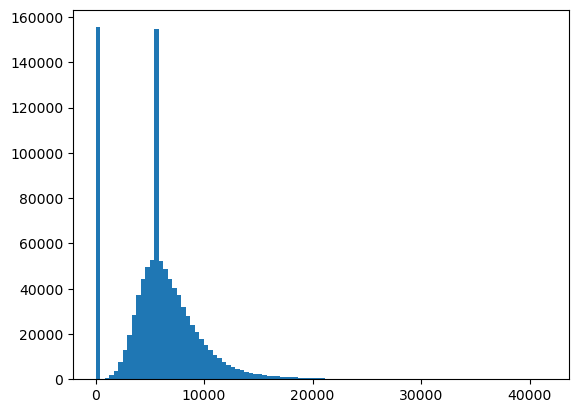

In [69]:
test_fix = dfo.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins=100);

In [75]:
dfg = dfo.groupby(['Store', 'DayOfWeek']).median(numeric_only=True)
dfg.head()

Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5140.0      575.5   1.0    1.0            0.0    5197.0
      2          4633.0      549.0   1.0    1.0            0.0    4789.0
      3          4383.0      530.0   1.0    1.0            0.0    4558.0
      4          4293.0      514.0   1.0    1.0            0.0    4311.0
      5          4609.0      548.0   1.0    1.0            0.0    4611.0

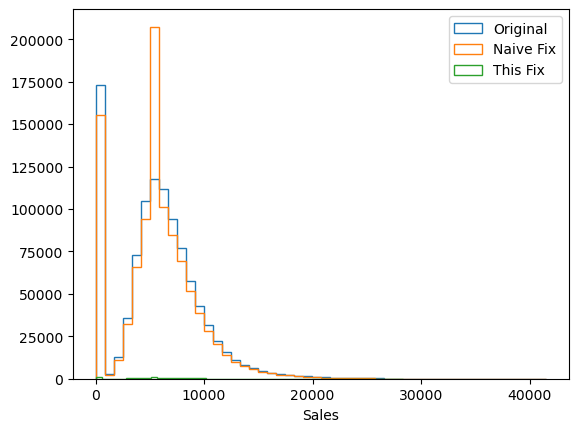

In [76]:
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))
opts = {'histtype': 'step', 'bins': 50}
plt.hist(dfo.Sales, label='Original', **opts)
plt.hist(test_fix, label='Naive Fix', **opts)
plt.hist(test_fix2, label='This Fix', **opts)
plt.legend(), plt.xlabel('Sales');